In [25]:
# Load Libs

import yaml
from importlib import reload
from torchvision import transforms
from src.train import dataset
from torch.utils.data import DataLoader
from src import plot
from torchinfo import summary
from torch import nn
import torch
from src.plot import plot_results

with open('params.yaml') as file:
    config = yaml.safe_load(file)


reload(dataset)
image_transform = transforms.Compose(
    [transforms.Resize(size=(64, 64)), transforms.ToTensor()]
)
data = dataset.MelDataset(
    config['data']['train_mels'], 
    config['data']['train_target'], 
    transform=image_transform)


# Split data
import torch
from torch.utils.data import random_split

train_data, test_data = random_split(data, lengths=[0.8, 0.2], generator=torch.Generator().manual_seed(config['base']['seed']))

print(len(train_data), len(test_data))
print(train_data, test_data)

# Create DataLoaders
train_dataloader = DataLoader(dataset=train_data, batch_size=24, shuffle=True, num_workers=0)
test_dataloader = DataLoader(dataset=test_data, batch_size=24, shuffle=12, num_workers=0)

11149 2787
<torch.utils.data.dataset.Subset object at 0x0000023270D108B0> <torch.utils.data.dataset.Subset object at 0x0000023270D10E50>


  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [02:24<21:39, 144.42s/it]

Epoch: 1 | train_loss: 0.6836 | train_acc: 0.5547 | test_loss: 0.6642 | test_acc: 0.5887


 20%|██        | 2/10 [04:26<17:31, 131.49s/it]

Epoch: 2 | train_loss: 0.5937 | train_acc: 0.6676 | test_loss: 0.3399 | test_acc: 0.8636


 30%|███       | 3/10 [05:25<11:27, 98.20s/it] 

Epoch: 3 | train_loss: 0.2824 | train_acc: 0.9018 | test_loss: 0.2448 | test_acc: 0.9170


 40%|████      | 4/10 [06:23<08:14, 82.43s/it]

Epoch: 4 | train_loss: 0.2106 | train_acc: 0.9346 | test_loss: 0.1797 | test_acc: 0.9480


 50%|█████     | 5/10 [07:23<06:10, 74.15s/it]

Epoch: 5 | train_loss: 0.1985 | train_acc: 0.9420 | test_loss: 0.1899 | test_acc: 0.9420


 60%|██████    | 6/10 [08:23<04:37, 69.32s/it]

Epoch: 6 | train_loss: 0.1890 | train_acc: 0.9453 | test_loss: 0.1796 | test_acc: 0.9473


 70%|███████   | 7/10 [09:22<03:18, 66.12s/it]

Epoch: 7 | train_loss: 0.1811 | train_acc: 0.9475 | test_loss: 0.1646 | test_acc: 0.9487


 80%|████████  | 8/10 [10:23<02:08, 64.47s/it]

Epoch: 8 | train_loss: 0.1724 | train_acc: 0.9512 | test_loss: 0.1482 | test_acc: 0.9587


 90%|█████████ | 9/10 [11:22<01:02, 62.67s/it]

Epoch: 9 | train_loss: 0.1623 | train_acc: 0.9534 | test_loss: 0.1591 | test_acc: 0.9487


100%|██████████| 10/10 [12:22<00:00, 74.27s/it]

Epoch: 10 | train_loss: 0.1614 | train_acc: 0.9525 | test_loss: 0.1497 | test_acc: 0.9530


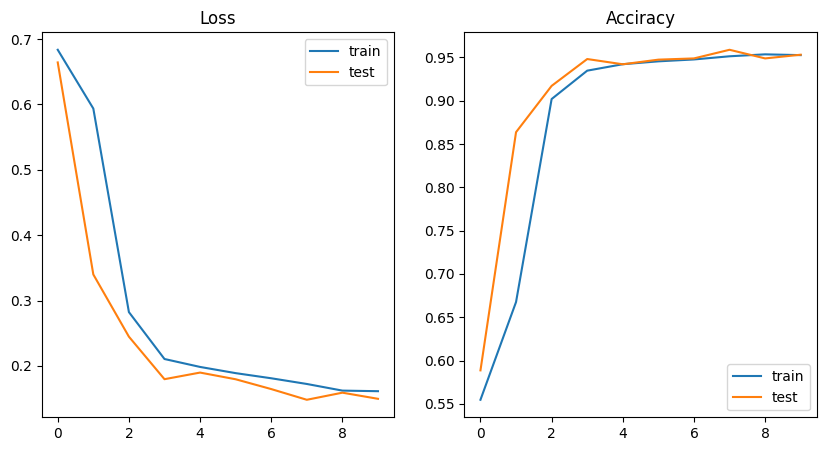

In [27]:
from src.train.train import train
from src.train.train import get_model, train_step, test_step

model0 = get_model('TinyVGG')(input_shape=3, hidden_units=10, output_shape=2)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model0.parameters(), lr=0.001)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

reslust_model0 = train(model=model0, train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader, epochs=10, loss_fn=loss_fn, optimizer=optimizer, device=device)


plot_results(results=reslust_model0)

In [28]:
from pathlib import Path
from datetime import datetime
from datetime import datetime


def save_results(model, model_name, resulst):
    res_path = Path('results')
    dt_string = datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
    res_dir_name = Path('results')

    model_file_name = model_name + ' '+ dt_string
    model_file_name = model_name + 'results'+ dt_string
    

    torch.save(model, res_path / res_dir_name)
    torch.save(res_dir_name / mo)

now = 2023-12-21 19:58:58.125758
date and time = 21/12/2023 19:58:58


'2023_12_21__19_58_58'

In [ ]:
from src.train.train import train
from src.train.train import get_model, train_step, test_step


model_resnet_50 = torchvision.models.

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model0.parameters(), lr=0.001)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

reslust_model0 = train(model=model0, train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader, epochs=10, loss_fn=loss_fn, optimizer=optimizer, device=device)


plot_results(results=reslust_model0)

  0%|          | 0/10 [00:00<?, ?it/s]

In [1]:
from src.train.train import train
import torchvision
import torch
from torch.utils.data import random_split
device = 'cuda' if torch.cuda.is_available() else 'cpu'


model_b0_weights = torchvision.models.EfficientNet_B0_Weights.IMAGENET1K_V1
model_b0 = torchvision.models.efficientnet_b0(weights=model_b0_weights).to(device)
model0_b0_transfrom = model_b0_weights.transforms()

output_shape = 2


model_b0.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

data = dataset.MelDataset(
    config['data']['train_mels'], 
    config['data']['train_target'], 
    transform=model0_b0_transfrom)

train_data, test_data = random_split(data, lengths=[0.8, 0.2], generator=torch.Generator().manual_seed(config['base']['seed']))

train_dataloader = DataLoader(dataset=train_data, batch_size=12, shuffle=True, num_workers=0)
test_dataloader = DataLoader(dataset=test_data, batch_size=12, shuffle=12, num_workers=0)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_b0.parameters(), lr=0.001)



reslust_model_b0 = train(model=model_b0,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       epochs=10,
                       loss_fn=loss_fn,
                       optimizer=optimizer,
                       device=device)

plot_results(results=reslust_model_b0)

c:\Users\anton\.virtualenvs\ht-DYvSqRLb\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AttributeError: module 'torchvision.models' has no attribute 'EfficientNet_B0_Weights'

In [ ]:
from src.train.train import train
import torchvision
import torch
from torch.utils.data import random_split
device = 'cuda' if torch.cuda.is_available() else 'cpu'


model_b0_weights = torchvision.models.ResNet
model_b0 = torchvision.models.efficientnet_b0(weights=model_b0_weights).to(device)
model0_b0_transfrom = model_b0_weights.transforms()

output_shape = 2


model_b0.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

data = dataset.MelDataset(
    config['data']['train_mels'], 
    config['data']['train_target'], 
    transform=model0_b0_transfrom)

train_data, test_data = random_split(data, lengths=[0.8, 0.2], generator=torch.Generator().manual_seed(config['base']['seed']))

train_dataloader = DataLoader(dataset=train_data, batch_size=12, shuffle=True, num_workers=0)
test_dataloader = DataLoader(dataset=test_data, batch_size=12, shuffle=12, num_workers=0)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_b0.parameters(), lr=0.001)



reslust_model_b0 = train(model=model_b0,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       epochs=10,
                       loss_fn=loss_fn,
                       optimizer=optimizer,
                       device=device)

plot_results(results=reslust_model_b0)

c:\Users\anton\.virtualenvs\ht-DYvSqRLb\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AttributeError: module 'torchvision.models' has no attribute 'EfficientNet_B0_Weights'